<a href="https://colab.research.google.com/github/Namsik-Yoon/2020_MaaSer_example_code/blob/master/%EA%B5%AD%EA%B0%80%ED%91%9C%EC%A4%80%EB%85%B8%EB%93%9C%EB%A7%81%ED%81%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수 라이브러리 설치 및 데이터 다운로드

국가표준노드링크 파일의 경우 노드파일의 field가 일부 누락된것으로 보여 국가공간정보포털 오픈마켓의 도로구간 데이터를 가져옴

국가표준노드링크 파일의 경우 학교IP로는 다운로드가 불가능하므로 별도 IP를 통해 데이터 다운로드 요망

In [4]:
!pip install wget
!pip install pyshp
!pip install pyproj

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=55e9f03ff5f0482ce70491f63f8fb4ac215f13ae18acf1c219d5db4b80fe810a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 225kB 3.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=fee500ff39d374cbcd12049e4d0dd91c3975ebcde72f07909eb37ae53940c44c
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
     |████████████████████████████████| 10.9MB 3.2MB/s 


In [0]:
import wget
import shapefile  #the pyshp module : Should install pyshp module.
import pandas as pd
from pyproj import Proj, transform  #Should install pyproj module.
import zipfile

## 국가표준노드링크 파일 필드확인

In [0]:
wget.download('https://www.dropbox.com/sh/r5tw8ulgreg5y7m/AABOX7b6ZJqWmp5UtSHgi0Zqa?dl=1')
with zipfile.ZipFile('[2020-03-31]NODELINKDATA.zip', 'r') as zip_ref:
    zip_ref.extractall('20200331_NODELINKDATA')

In [0]:
wget.download('https://www.dropbox.com/s/6m8xbl559d2l5zw/%5B2019-09-20%5DNODELINKDATA.zip?dl=1')
with zipfile.ZipFile('[2019-09-20]NODELINKDATA.zip', 'r') as zip_ref:
    zip_ref.extractall('20190920_NODELINKDATA')

In [0]:
## 데이터 필드 확인(노드 데이터의 필요한 필드가 없음)
shp_path_node = './20200331_NODELINKDATA/MOCT_NODE.shp'
sf_node = shapefile.Reader(shp_path_node,encoding='cp949')
shp_path_link = './20200331_NODELINKDATA/MOCT_LINK.shp'
sf_link = shapefile.Reader(shp_path_link,encoding='cp949')

In [0]:
fields_node = [x[0] for x in sf_node.fields][1:]
records_node = sf_node.records()
shps = [s.points for s in sf_node.shapes()] # node has coordinate data.
# link
fields_link = [x[0] for x in sf_link.fields][1:]
records_link = sf_link.records()

In [0]:
node_dataframe = pd.DataFrame(columns=fields_node, data=records_node)
#add the coordinate data to a column called "coords"
node_dataframe = node_dataframe.assign(coords=shps)
# link
link_dataframe = pd.DataFrame(columns=fields_link, data=records_link)

In [11]:
node_dataframe.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,coords
0,2510185600,101,행복스케치,0,,"[[283179.5199999958, 530621.790199995]]"
1,2510185700,101,까사벨라,0,,"[[283128.2349999994, 530630.2953999937]]"
2,2510185800,101,일능이한방백숙,0,,"[[283076.4544999972, 530640.5878999978]]"
3,2510185900,103,속성변화점,0,,"[[283218.89279999584, 530863.3396999985]]"
4,2510185901,101,우산동333-24,0,,"[[283261.64609999955, 530858.6345999986]]"


In [12]:
link_dataframe.head()

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK
0,3880778900,3880289100,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,134.2642,
1,3880779000,3880289500,3880289000,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1724,
2,3880779100,3880289000,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1723,
3,3880779200,3880289600,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,
4,3880779300,3880289500,3880289600,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,


In [13]:
len(node_dataframe),len(link_dataframe)

(191497, 515445)

## 국가공간정보포털 데이터의 필드확인

확인해보니 이것도 뭐....원하는 데이터는 아닌듯 하다

In [0]:
wget.download('https://www.dropbox.com/s/cx4u6dlfuof9cnu/Z_KAIS_TL_SPRD_MANAGE_%EC%9D%B8%EC%B2%9C.zip?dl=1')
with zipfile.ZipFile('Z_KAIS_TL_SPRD_MANAGE_??.zip', 'r') as zip_ref:
    zip_ref.extractall('Incheon_NODELINK')
with zipfile.ZipFile('/content/Incheon_NODELINK/Z_KAIS_TL_SPRD_MANAGE_28000.zip', 'r') as zip_ref:
    zip_ref.extractall('Incheon_NODELINK')

In [0]:
## 데이터 필드 확인(노드 데이터의 필요한 필드가 없음)
shp_path = '/content/Incheon_NODELINK/Z_KAIS_TL_SPRD_MANAGE_28000.shp'
sf_data = shapefile.Reader(shp_path,encoding='cp949')

In [0]:
fields = [x[0] for x in sf_data.fields][1:]
records = sf_data.records()
shps = [s.points for s in sf_data.shapes()]

In [0]:
sf2df = pd.DataFrame(columns=fields, data=records)

In [18]:
sf2df.head()

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,RDS_DPN_SE,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD
0,20101228,국토해양부 노선명을 이용하여 명명함,2000,Incheongukjegonghang Expressway,20141030,직권수정(속성변경),99,20101228,20150326165002,인천 중구 운서동 2848,0,5246,인천 중구 중산동 1865-6,인천국제공항고속도로,1000029,50.0,38550.0,1,28110,1
1,20101228,인천대교 명칭을 이용하여 명명함,2000,Incheondaegyo Expressway,20180531,광역도로 관리주체 변경(행안부 -> 시도),71,20101228,20180531190000,인천 중구 운서동 1507-8,0,5244,인천 중구 운남동 1494-1,인천대교고속도로,1000037,50.0,21380.0,1,28110,2
2,20090630,서해안을 향해 도로가 형성되어 서해안 시대의 무한한 발전을 의미하여 제명,20,Seohae-daero,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090706,20141030235425,신흥동3가77잡,1,305,동구 송현동 23-30,서해대로,2008001,3.0,6180.0,2,28110,2
3,20090630,서해안을 향해 도로가 형성되어 서해안 시대의 무한한 발전을 의미하여 제명,20,Seohae-daero,20141030,직권수정(속성변경),99,20090706,20180302132924,신흥동3가77잡,0,103,동구 송현동 23-30,서해대로,2008001,45.0,6180.0,2,28110,2
4,20090630,서해안을 향해 도로가 형성되어 서해안 시대의 무한한 발전을 의미하여 제명,20,Seohae-daero,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090706,20141030235425,신흥동3가77잡,1,306,동구 송현동 23-30,서해대로,2008001,1.0,6180.0,2,28110,2


# 국가표준노드링크를 바탕으로 제대로된 데이터인지 시각화 

In [34]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

In [0]:
gdf_node = gpd.read_file(shp_path_node)
gdf_link = gpd.read_file(shp_path_link)

In [28]:
gdf_node.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry
0,2510185600,101,행복스케치,0,None,POINT (283179.520 530621.790)
1,2510185700,101,까사벨라,0,None,POINT (283128.235 530630.295)
2,2510185800,101,일능이한방백숙,0,None,POINT (283076.454 530640.588)
3,2510185900,103,속성변화점,0,None,POINT (283218.893 530863.340)
4,2510185901,101,우산동333-24,0,None,POINT (283261.646 530858.635)


In [29]:
gdf_link.head()

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry
0,3880778900,3880289100,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,134.2642,None,"LINESTRING (384235.005 304071.552, 384249.334 ..."
1,3880779000,3880289500,3880289000,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1724,None,"LINESTRING (384249.324 304204.962, 384254.194 ..."
2,3880779100,3880289000,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1723,None,"LINESTRING (384242.283 304246.293, 384237.412 ..."
3,3880779200,3880289600,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,None,"LINESTRING (384300.783 304207.287, 384243.828 ..."
4,3880779300,3880289500,3880289600,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,None,"LINESTRING (384242.907 304199.708, 384299.862 ..."


<Figure size 1440x1440 with 0 Axes>

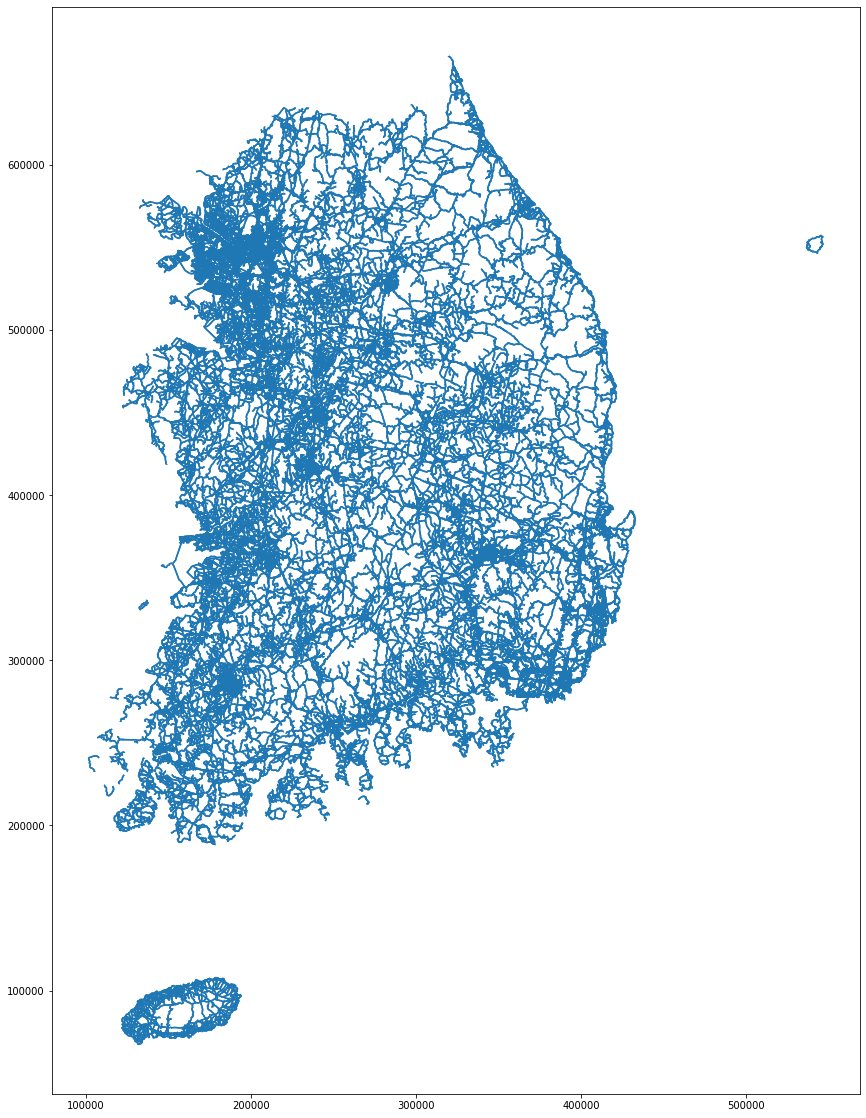

In [37]:
gdf_link.plot(figsize=(20,20))
plt.show()

# 행정동 경계구분을 위한 데이터 가져오기

In [0]:
wget.download('https://www.dropbox.com/s/sykyir3wu4dyi7l/NGII_CDM_BOUNDARY.zip?dl=1')
with zipfile.ZipFile('NGII_CDM_BOUNDARY.zip', 'r') as zip_ref:
    zip_ref.extractall('BOUNDARY')

In [0]:
shp_path_boundary = '/content/BOUNDARY/Z_NGII_N3A_G0100000.shp'
gdf_boundary= gpd.read_file(shp_path_boundary,encoding='cp949')

In [48]:
gdf_boundary.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,1000037608007G01010000000000000257,4128000000,고양시,HJD005,G0018113,201378,"POLYGON ((193892.043 471972.993, 193946.724 47..."
1,1000037608084G01010000000000000256,4119000000,부천시,HJD005,G0018113,S14110147,"POLYGON ((179355.541 450496.848, 179361.085 45..."
2,1000037612074G01010000000000000267,4127000000,안산시,HJD005,G0018113,S14110159,"MULTIPOLYGON (((152342.611 398314.050, 152345...."
3,1000037612057G01010000000000000255,4117000000,안양시,HJD005,G0018113,201378,"POLYGON ((194199.411 438208.575, 194209.410 43..."
4,1000037709079G01010000000000000258,4146000000,용인시,HJD005,G0018113,201378,"POLYGON ((202627.339 430311.689, 202635.992 43..."


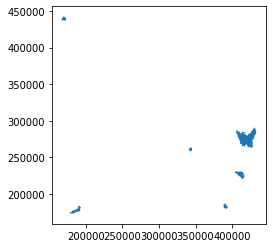

In [57]:
gdf_boundary[gdf_boundary['NAME']=='남구']['geometry'].plot()

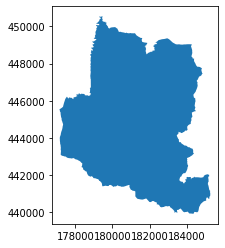

In [53]:
gdf_boundary[gdf_boundary['NAME']=='부천시']['geometry'].plot()